In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

PREPROCESSING DATA

In [ ]:
df = pd.read_csv('/content/test4.csv')

In [ ]:
df.head(10)

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-15 12:00:01,0.19464,0.99918,489.16266,1047.13831,25.46139,0.0,32.97053,28.64319,4.52908,...,5.03592,276.72888,-0.00072,14809,276.47565,270.30890,28.4608,9972,27057,0
1,2021-07-15 12:00:02,0.19464,0.99918,489.16266,1047.13831,25.46139,0.0,29.99137,28.64319,4.52908,...,5.03592,280.74365,-0.00029,14908,281.72021,272.31628,28.4608,9972,27051,0
2,2021-07-15 12:00:03,0.19464,1.00650,489.16266,1047.13831,25.46139,0.0,30.98430,28.66761,4.48789,...,5.03592,287.21783,-0.00260,15124,287.50726,275.24597,28.4608,9972,27050,0
3,2021-07-15 12:00:04,0.19464,1.01303,489.16266,1047.13831,25.46139,0.0,32.97053,28.68935,4.47755,...,5.03592,293.40277,-0.00181,15234,294.28894,277.75964,28.4608,9972,27050,0
4,2021-07-15 12:00:05,0.19464,1.02012,489.16266,1047.13831,25.46139,0.0,32.97053,28.71300,4.51440,...,5.03592,296.74841,-0.00109,15376,295.98883,280.21918,28.4608,9972,27058,0
5,2021-07-15 12:00:06,0.19464,1.02630,489.16266,1047.13831,25.46139,0.0,29.99137,28.73360,4.50499,...,5.03592,301.21527,-0.00203,15501,299.13556,282.47974,28.4608,9972,27048,0
6,2021-07-15 12:00:07,0.19464,1.03305,489.16266,1047.13831,25.46139,0.0,29.99137,28.75611,4.46412,...,5.03592,303.67474,0.00203,15625,303.69287,285.30090,28.4608,9972,27054,0
7,2021-07-15 12:00:08,0.19464,1.03923,489.16266,1047.13831,25.46139,0.0,31.97761,28.77671,4.48556,...,5.03592,303.67474,0.00130,15714,308.61182,287.50726,28.4608,9972,27050,0
8,2021-07-15 12:00:09,0.19464,1.05262,489.16266,1047.13831,25.46139,0.0,29.99137,28.82134,4.47615,...,5.03592,308.30438,0.00130,15714,308.61182,287.50726,28.4608,9972,27050,0
9,2021-07-15 12:00:10,0.19464,1.05708,489.16266,1047.13831,25.46139,0.0,29.99137,28.83622,4.48247,...,5.03592,311.79468,0.00029,15904,312.30109,290.18372,28.4608,9972,27050,0


In [ ]:
x = df.iloc[:,:-1]
y = df['Attack']

In [ ]:
x.drop('timestamp',axis=1,inplace=True)


In [ ]:
x.isna().sum()

P1_B2004      0
P1_B2016      0
P1_B3004      0
P1_B3005      0
P1_B4002      0
             ..
P4_ST_LD      0
P4_ST_PO      0
P4_ST_PS      0
P4_ST_PT01    0
P4_ST_TT01    0
Length: 86, dtype: int64

In [ ]:
x.head(5)

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01
0,0.19464,0.99918,489.16266,1047.13831,25.46139,0.0,32.97053,28.64319,4.52908,4.46472,...,1.17548,5.03592,276.72888,-0.00072,14809,276.47565,270.30890,28.4608,9972,27057
1,0.19464,0.99918,489.16266,1047.13831,25.46139,0.0,29.99137,28.64319,4.52908,4.46472,...,1.04892,5.03592,280.74365,-0.00029,14908,281.72021,272.31628,28.4608,9972,27051
2,0.19464,1.00650,489.16266,1047.13831,25.46139,0.0,30.98430,28.66761,4.48789,4.46472,...,0.99463,5.03592,287.21783,-0.00260,15124,287.50726,275.24597,28.4608,9972,27050
3,0.19464,1.01303,489.16266,1047.13831,25.46139,0.0,32.97053,28.68935,4.47755,4.46472,...,0.86807,5.03592,293.40277,-0.00181,15234,294.28894,277.75964,28.4608,9972,27050
4,0.19464,1.02012,489.16266,1047.13831,25.46139,0.0,32.97053,28.71300,4.51440,4.46472,...,0.79572,5.03592,296.74841,-0.00109,15376,295.98883,280.21918,28.4608,9972,27058


In [ ]:
print('Length of the Dataset: {}'.format(len(x)))

Length of the Dataset: 129600


**TRAINING AND TESTING DIFFERENT MODELS FOR ACCURACY ON HAI DATASET**

In [ ]:


import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
x_main,x_test,y_main,y_test= train_test_split(x,y,test_size=50,stratify=y)
x_train,x_val,y_train,y_val=train_test_split(x_main,y_main,test_size=50)

In [ ]:
#SVM (Support Vector Machine)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_main, x_test, y_main, y_test = train_test_split(x, y, test_size=50, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size=50)

svm_model = SVC()
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.96


In [ ]:
#KNN (Kneighborsclassifier)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_main, x_test, y_main, y_test = train_test_split(x, y, test_size=50, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size=50)

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.96


In [ ]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_main, x_test, y_main, y_test = train_test_split(x, y, test_size=50, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size=50)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.96


In [ ]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x_main, x_test, y_main, y_test = train_test_split(x, y, test_size=50, stratify=y)

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_main)

x_train, x_val, y_train, y_val = train_test_split(x_scaled, y_main, test_size=50)

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(x_train, y_train)

y_pred = log_reg_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.96


**DATA VISUALIZATION**

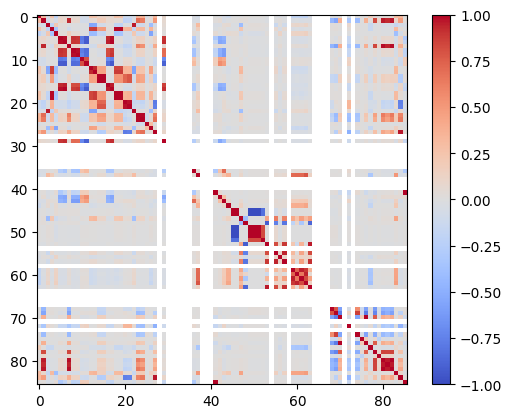

In [ ]:
#Heatmap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.imshow(x.corr(), cmap="coolwarm")
plt.colorbar()
plt.show()

<ipython-input-7-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


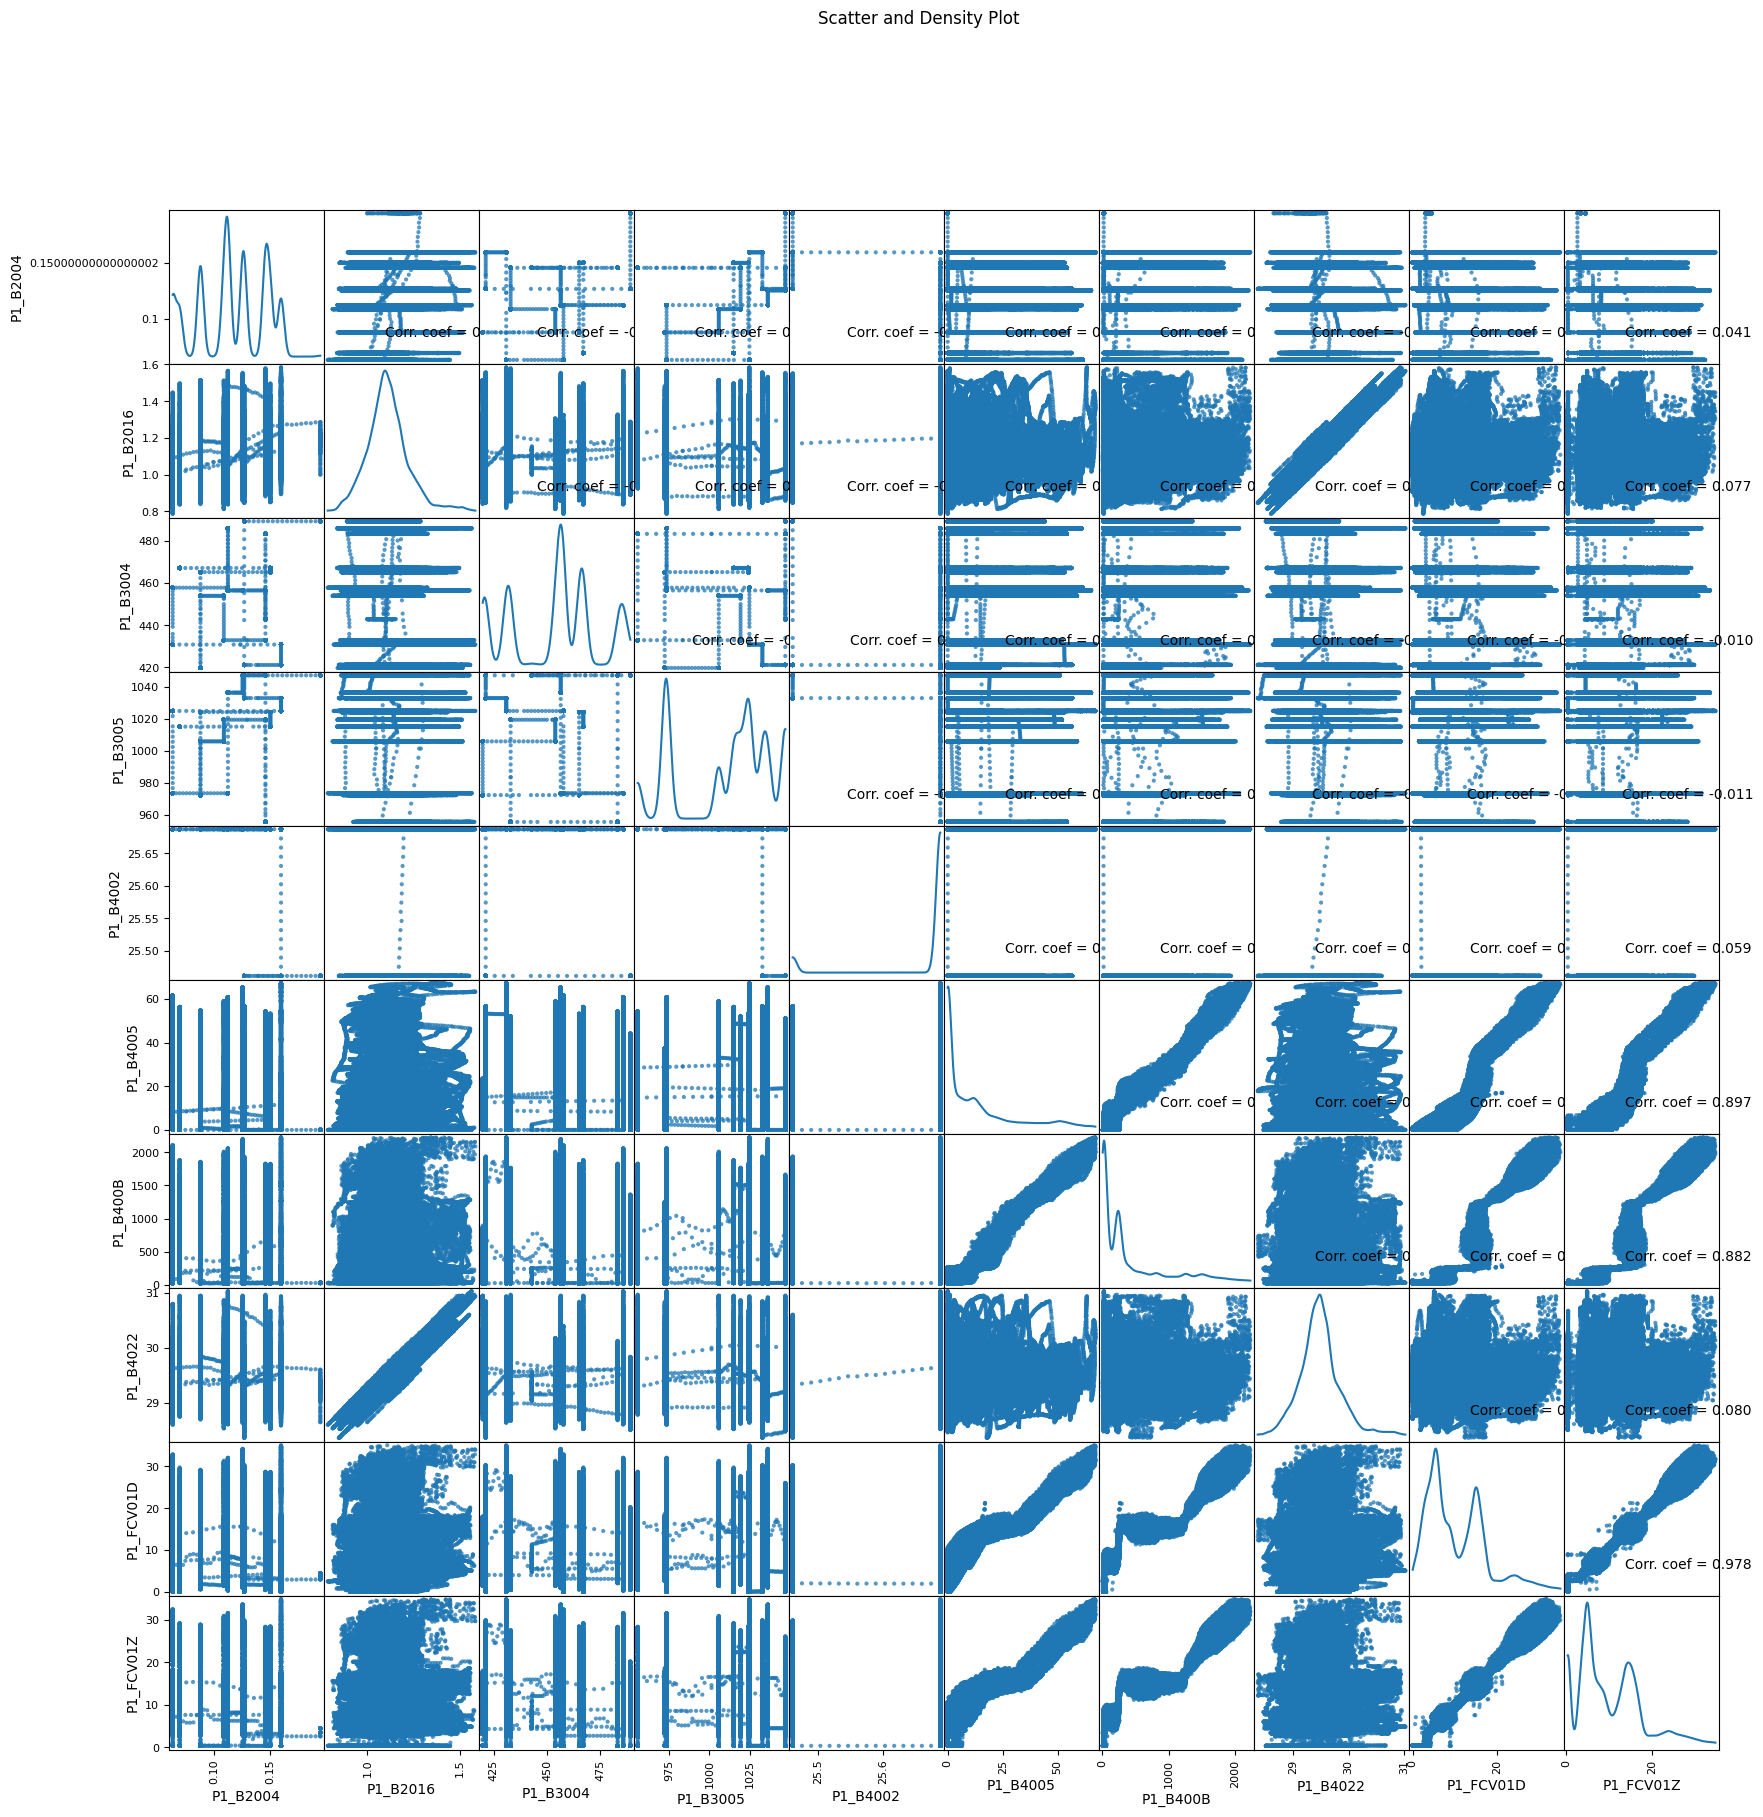

In [ ]:
#ScatterMatrix
plotScatterMatrix(df, 20, 10)

<ipython-input-65-e43e291978c6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


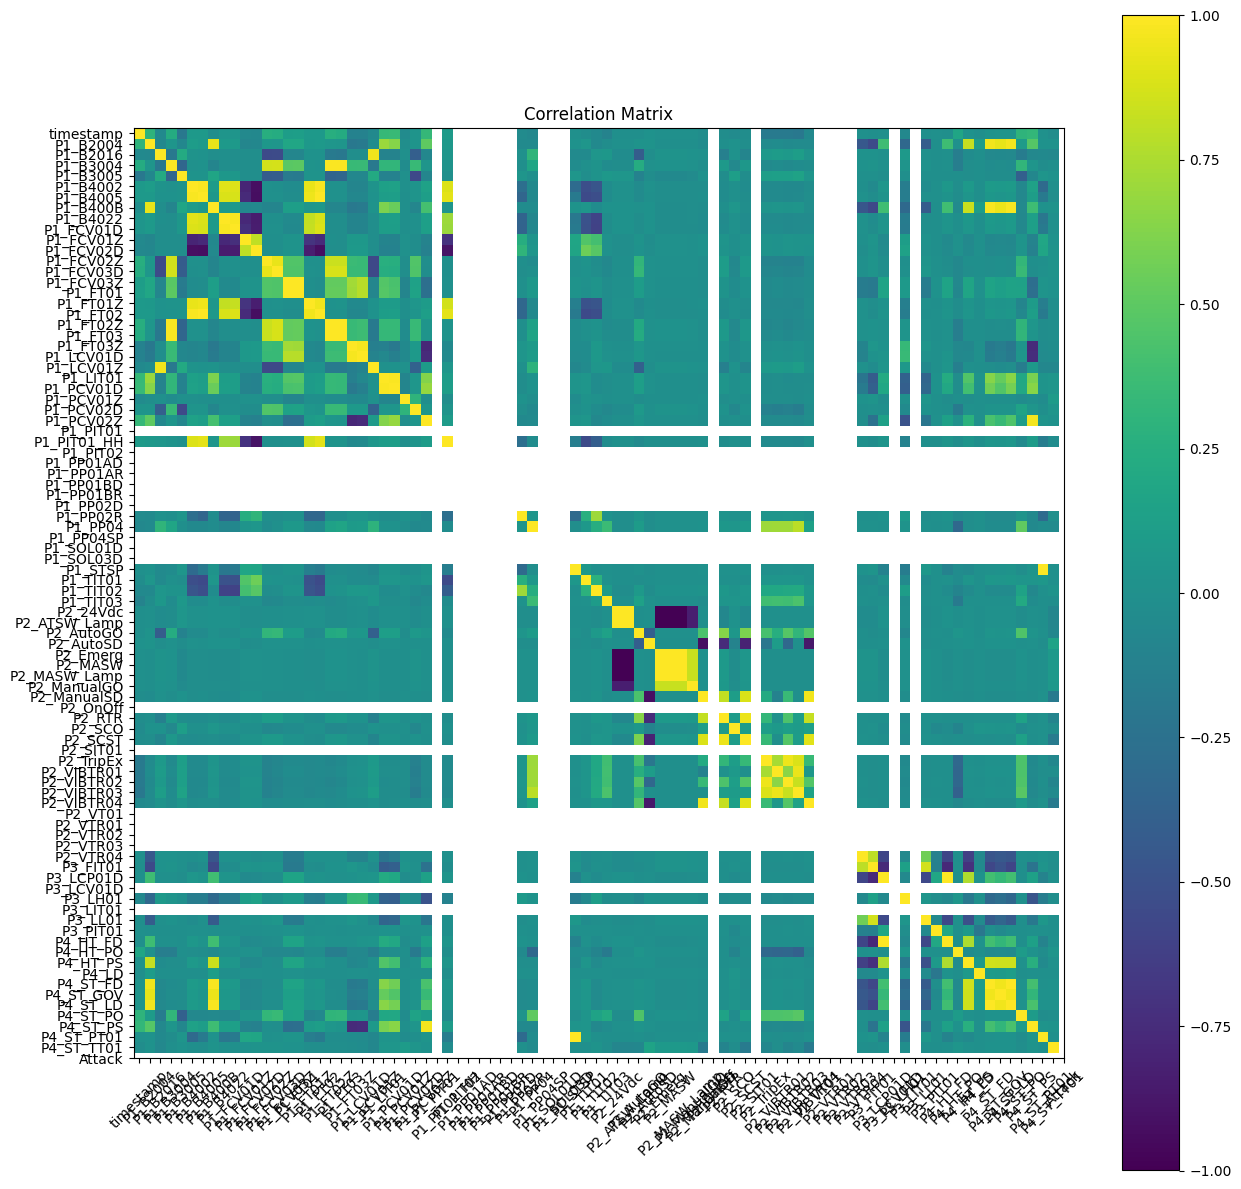

In [ ]:
#CorrelationMatrix
def plotCorrelationMatrix(df, n):
    # Create a correlation matrix
    corrMatrix = df.corr()

    # Select the upper triangle of the correlation matrix
    corrMatrix = corrMatrix.iloc[0:n, 0:n]

    # Plot the correlation matrix in a new figure window
    plt.figure(figsize=(15, 15))
    plt.imshow(corrMatrix,)
    plt.colorbar()
    plt.xticks(range(n), df.columns, rotation=45)
    plt.yticks(range(n), df.columns)
    plt.title("Correlation Matrix")
    plt.show()

plotCorrelationMatrix(df, 88)